In [1]:
import numpy as np 
import pandas as pd

In [2]:
crop=pd.read_csv("Crop_Recommendation.csv")
crop.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [3]:
crop.shape

(2200, 8)

In [4]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
crop.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [6]:
crop.duplicated().sum()

0

In [7]:
crop.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
non_numeric_cols = crop.select_dtypes(exclude=[float, int]).columns
crop_numeric = crop.drop(columns=non_numeric_cols)
corr = crop_numeric.corr()

corr

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

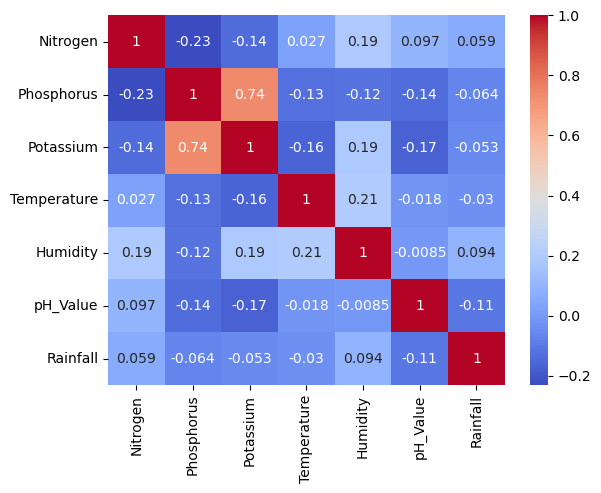

In [9]:
import seaborn as sns
sns.heatmap(corr, annot=True,cbar=True,cmap="coolwarm")

In [10]:
print(crop.columns)


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')


In [11]:
crop['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [12]:
crop.value_counts()

Nitrogen  Phosphorus  Potassium  Temperature  Humidity   pH_Value  Rainfall    Crop       
0         5           36         24.351938    90.886124  6.152907  105.529185  Pomegranate    1
69        60          54         36.322681    93.061344  6.989927  141.173693  Papaya         1
          37          42         23.058049    83.370118  7.073454  251.055000  Rice           1
          46          41         23.641248    80.285979  5.012140  263.110330  Rice           1
          47          40         25.371227    76.240367  6.130136  183.827079  Jute           1
                                                                                             ..
26        126         195        21.413638    92.991245  5.878569  118.397907  Apple          1
          122         202        22.445170    94.737635  5.617227  107.184327  Apple          1
          121         201        22.191094    90.025751  6.162034  112.312663  Apple          1
          80          83         17.084985   

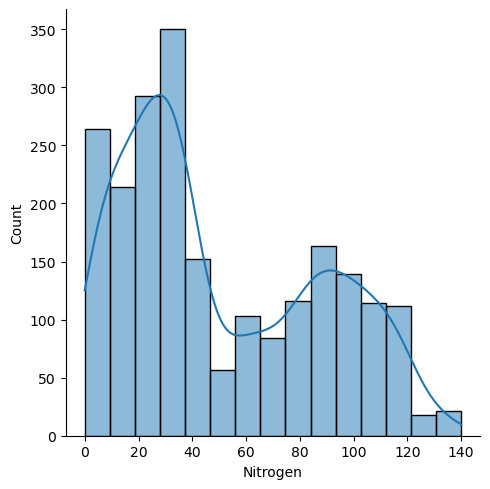

In [13]:
import matplotlib.pyplot as plt
sns.displot(crop['Nitrogen'],kde=True)
plt.show()

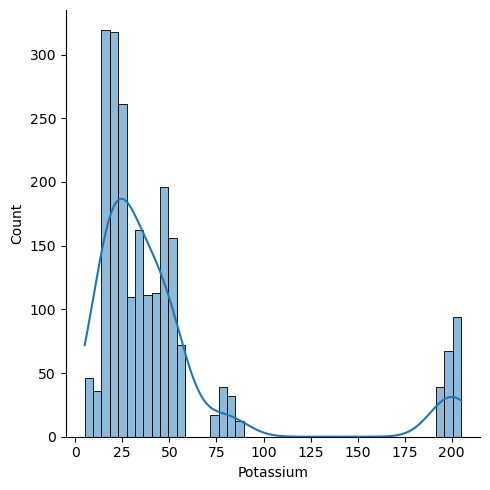

In [14]:
sns.displot(crop['Potassium'],kde=True)
plt.show()

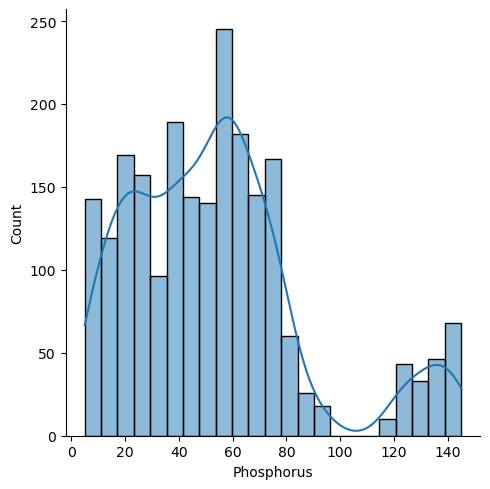

In [15]:
sns.displot(crop['Phosphorus'],kde=True)
plt.show()

In [16]:
crop_dict={
    'Rice':1,
    'Maize':2,       
    'Jute':3,      
    'Cotton':4,       
    'Coconut':5,      
    'Papaya':6,         
    'Orange':7,    
    'Apple':8,    
    'Muskmelon':9,     
    'Watermelon':10, 
    'Grapes':11,
    'Mango':12,   
    'Banana':13,    
    'Pomegranate':14,   
    'Lentil':15,
    'Blackgram':16,      
    'MungBean':17,
    'MothBeans':18,     
    'PigeonPeas':19,
    'KidneyBeans':20,
    'ChickPea':21,
    'Coffee':22
}
crop['Crop_num']=crop['Crop'].map(crop_dict)

In [17]:
crop['Crop_num'].value_counts()

Crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [18]:
crop.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,Crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,1


In [19]:
x=crop.drop(['Crop_num'],axis=1)
y=crop['Crop_num']

In [20]:
x.shape,y.shape

((2200, 8), (2200,))

In [21]:
from sklearn.model_selection import train_test_split


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1760, 8), (440, 8), (1760,), (440,))

In [24]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = x_train.select_dtypes(include=['object']).columns

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])
    label_encoders[col] = le

In [25]:
x_train

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1656,17,16,14,16.396243,92.181519,6.625539,102.944161,16
752,37,79,19,27.543848,69.347863,7.143943,69.408782,2
892,7,73,25,27.521856,63.132153,7.288057,45.208411,10
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,1
1179,0,17,30,35.474783,47.972305,6.279134,97.790725,12
...,...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,16
1095,108,94,47,27.359116,84.546250,6.387431,90.812505,1
1130,11,36,31,27.920633,51.779659,6.475449,100.258567,12
1294,11,124,204,13.429886,80.066340,6.361141,71.400430,7


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [27]:
x_train

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         1.93473784e-01,  5.14970176e-03,  8.65723055e-01],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
         8.63917548e-01, -6.05290566e-01, -1.35560529e+00],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
         1.05029771e+00, -1.04580687e+00, -8.62748061e-02],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -6.34357580e-04, -4.37358211e-02,  2.31057814e-01],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
        -1.48467347e-01, -5.69036842e-01, -5.62273737e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
         6.86860180e-01, -8.96531475e-01, -8.62748061e-02]])

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
models={
    'LogisticRegression':LogisticRegression(),
    'RandomForestClassifier':RandomForestClassifier(),
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier()
}

for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{name} with accuracy: {accuracy_score(y_test,y_pred)}")

LogisticRegression with accuracy: 1.0
RandomForestClassifier with accuracy: 1.0
SVC with accuracy: 1.0
DecisionTreeClassifier with accuracy: 1.0
KNeighborsClassifier with accuracy: 0.9931818181818182
GaussianNB with accuracy: 1.0
ExtraTreeClassifier with accuracy: 0.9590909090909091
GradientBoostingClassifier with accuracy: 0.9977272727272727
AdaBoostClassifier with accuracy: 0.13863636363636364


d:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BaggingClassifier with accuracy: 1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier



rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

def recommend_crop(Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH_Value, Rainfall, Additional_Feature):
    input_data = [[Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH_Value, Rainfall, Additional_Feature]]
    prediction = rfc.predict(input_data)
    return prediction[0]


Nitrogen = 20
Phosphorus = 30
Potassium = 40
Temperature = 40.0
Humidity = 60
pH_Value = 30
Rainfall = 50
Additional_Feature = 10  

predict = recommend_crop(Nitrogen, Phosphorus, Potassium, Temperature, Humidity, pH_Value, Rainfall, Additional_Feature)
crop_dict = {1: 'Rice', 2: 'Maize', 3: 'Jute', 4: 'Cotton', 5: 'Coconut', 6: 'Papaya', 7: 'Orange', 8: 'Apple', 9: 'Muskmelon', 10: 'Watermelon', 11: 'Grapes', 12: 'Mango', 13: 'Banana', 14: 'Pomegranate', 15: 'Lentil', 16: 'Blackgram', 17: 'MungBean', 18: 'MothBeans', 19: 'PigeonPeas', 20: 'KidneyBeans', 21: 'ChickPea', 22: 'Coffee'}

if predict in crop_dict:
    crop = crop_dict[predict]
    print("The recommended crop is {}".format(crop))
else:
    print("Sorry we could not recommend any crop")

The recommended crop is Grapes


In [34]:
import pickle
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X_train = np.array([[20, 30, 40, 25.0, 60, 6.5, 200], [10, 20, 30, 20.0, 50, 5.5, 150]])  # Add more training data
ms = MinMaxScaler()
ms.fit(X_train)

pickle.dump(rfc, open('model.pkl', 'wb'))

pickle.dump(ms, open('minmaxscaler.pkl', 'wb'))